In [32]:
import jaxpv
import jax
from jax import numpy as np
from jax.scipy.optimize import minimize
from functools import partial
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../")
from test import design, ls
cell = jaxpv.simulator.init_cell(design, ls)

In [46]:
N = cell.Eg.size
bound_eq = jaxpv.bcond.boundary_eq(cell)
phi_ini = np.linspace(bound_eq.phi0, bound_eq.phiL, N)

In [47]:
def f(phi):
    pot = jaxpv.objects.Potentials(phi, np.zeros(N), np.zeros(N))
    resid = jaxpv.residual.comp_F_eq(cell, bound_eq, pot)
    return np.linalg.norm(resid)

In [95]:
solution = minimize(f, phi_ini, method="bfgs", tol=1e-12)

In [96]:
pot_ini = jaxpv.objects.Potentials(phi_ini, np.zeros(N), np.zeros(N))
pot_eq = jaxpv.solver.solve_eq(cell, bound_eq, pot_ini)

INFO:root:	 iteration: 1          error: 66.91653061463086
INFO:root:	 iteration: 2          error: 60.11183988494553
INFO:root:	 iteration: 3          error: 47.73431311446412
INFO:root:	 iteration: 4          error: 34.431773579729786
INFO:root:	 iteration: 5          error: 22.792069933995396
INFO:root:	 iteration: 6          error: 13.77871910169957
INFO:root:	 iteration: 7          error: 7.348736757686016
INFO:root:	 iteration: 8          error: 3.198657247642982
INFO:root:	 iteration: 9          error: 0.8717436402367083
INFO:root:	 iteration: 10         error: 0.04306003259057671
INFO:root:	 iteration: 11         error: 0.0004221580570967811
INFO:root:	 iteration: 12         error: 5.1870581391196724e-08


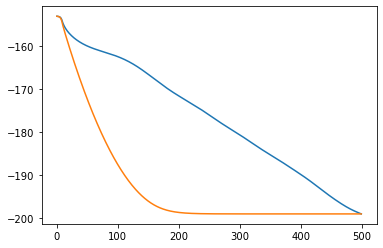

In [99]:
plt.plot(solution.x)
plt.plot(pot_eq.phi)